In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.shape

(200, 5)

As you can see, there are 5 columns in the dataset. For the sake of simplicity, in this example, I am using the columns "Spending Score (1-100)" and "Annual Income (k$)"

The scatter plot of the 2 columns is shwon in the next cell.

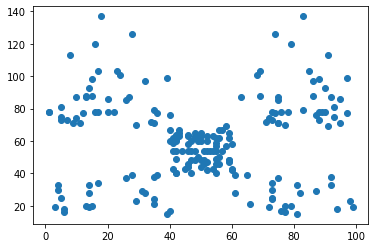

In [9]:
plt.scatter(data["Spending Score (1-100)"],data["Annual Income (k$)"])

As we can see, five different clusters are seen in the image. so, I am picking 5 as the number of clusters.

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(data[["Spending Score (1-100)","Annual Income (k$)"]])

Now, I am creating a new column "cluster" and copy the predictions to the new column

In [12]:
data["Cluster"] = y_pred
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


now, we need to separate the 5 clusters into different dataframes. then plot the clusters in different colors

In [13]:
df1 = data[data.Cluster == 0]
df2 = data[data.Cluster == 1]
df3 = data[data.Cluster == 2]
df4 = data[data.Cluster == 3]
df5 = data[data.Cluster == 4]

Text(0.5, 0, 'Spending Score (1-100)')

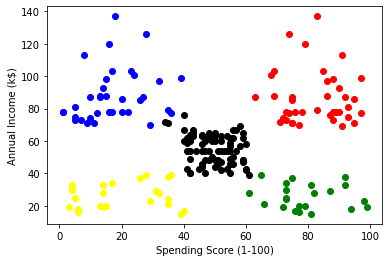

In [15]:
plt.scatter(df1["Spending Score (1-100)"], df1["Annual Income (k$)"], color = "green")
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color='blue')
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color='red')
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color='yellow')
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color='black')

plt.ylabel("Annual Income (k$)")
plt.xlabel("Spending Score (1-100)")

In some cases the data is not clustered optimally. This is due to the fact that our scaling is not right and there is a big gap between the values in the y-axis and the x-axis. So, we need to scale the data prior to the clustreing. let's do the scaling with the MinMaxSclaer

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [19]:
data["Spending Score (1-100)"] = scaler.fit_transform(data[["Spending Score (1-100)"]])
data["Annual Income (k$)"] = scaler.fit_transform(data[["Annual Income (k$)"]])

In [20]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,3


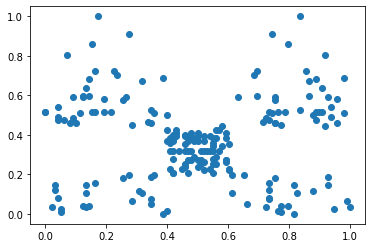

In [21]:
plt.scatter(data["Spending Score (1-100)"], data["Annual Income (k$)"])

Again, the same process with the scaled data

In [22]:
km = KMeans(n_clusters= 5)
y_pred = km.fit_predict(data[["Spending Score (1-100)", "Annual Income (k$)"]])
data["Cluster"] = y_pred
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,4


we can obtain the value of the cenroids by the "clustercenters"

In [23]:
km.cluster_centers_

array([[0.82783883, 0.58638083],
       [0.16443149, 0.6       ],
       [0.79962894, 0.08792846],
       [0.49508692, 0.33029751],
       [0.20319432, 0.09265859]])

in the next plot, I am showing the cenroids by purple color and the * marker

Text(0, 0.5, 'Annual Income')

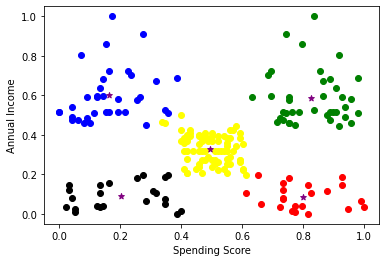

In [27]:
df1=data[data.Cluster==0]
df2=data[data.Cluster==1]
df3=data[data.Cluster==2]
df4=data[data.Cluster==3]
df5=data[data.Cluster==4]

plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color='green')
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color='blue')
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color='red')
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color='yellow')
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')

Now, let's find the optimal value of K by using the elbow method.

we will try the K values from 1 to 10 and we will copy the SSE values to the sse

In [28]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[["Spending Score (1-100)", "Annual Income (k$)"]])
    sse.append(km.inertia_)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Now, let's plot the sse plot. As we can see, the K=5 is the optimal value

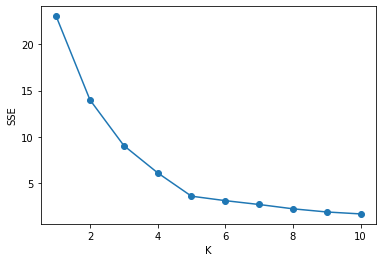

In [29]:
plt.xlabel("K")
plt.ylabel("SSE")

plt.plot(k_rng, sse)
plt.scatter(k_rng, sse)